<a href="https://colab.research.google.com/github/gxilly/bsc_dpdm22/blob/main/%5Bdataprep1%5D_property_estimator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import gspread as gs
import pandas as pd
import numpy as np
import seaborn as sns

from matplotlib import pyplot as plt
import matplotlib

In [ ]:
#from google.colab import drive 
#drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
#import os
#os.chdir('/content/gdrive/MyDrive/bscdata')

#!pwd #เช็ค paht ที่กำลังทำงานอยู่

/content/gdrive/MyDrive/bscdata


In [ ]:
# open file
#house = pd.read_excel('คำตอบนักประเมินaj.xlsx',sheet_name=0)
#print(house.shape) # shown number of (row, column)
#house.head()

- ดูจากค่าอื่นๆ ที่ดินนี้อยู่ที่ไหน พื้นที่เท่าไหร่ ตร.ละเท่าไหร่ feature ต่างๆ เอาค่าพวกนี้มาสร้าง model ก่อน แล้วเอาค่าที่มีอยู่ มาทำนายค่าที่หายไป ## ดีเยี่ยม!!
- 0 เกิน 0 ขาด ส่วนใหญ่น่าจะตกแค่ตัวเดียว ต่างกัน 10 เท่า
ควรเอาราคาสองอันมาหารกัน (ประเมิน/ตั้งขาย, ตั้งขาย/ประเมิน) ห่างกัน 9-10,0.1 

# import ข้อมูล

export?format=xlsx

In [3]:
link = 'https://docs.google.com/spreadsheets/d/1hRZ_CnkB0tZDDgW_pXS-aw61X1PIxZDdeT1q2SXXIIs/export?format=xlsx'

In [4]:
house = pd.read_excel(link,sheet_name='house')
land = pd.read_excel(link,sheet_name='land')
condo = pd.read_excel(link,sheet_name='condo')
tw = pd.read_excel(link,sheet_name='town home')
sh = pd.read_excel(link,sheet_name='shop house')

# สรุปข้อมูลของนักประเมินแต่ละคน โดยพิจารณาจาก ความมั่นใจในการประเมิน ประเมินราคาซื้อ-ขาย ให้คะแนนทรัพย์

df['Name'].unique() #ในคอลัมน์นั้น มีค่าอะไรบ้าง

## House

In [5]:
house

,ID ผู้ประเมิน,post id,property_type,ความมั่นใจในการเมินราคาทรัพย์,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย,ปัจจัยในการประเมินราคาซื้อ-ขาย,เหตุผลไม่มั่นใจราคาประเมิน,ให้คะแนนทรัพย์
0,1,https://nayoo.co/khonkaen/posts/25,บ้านเดี่ยว,มั่นใจ,2890000,2500000.0,"5,000-15,000",NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน
1,2,https://nayoo.co/khonkaen/posts/25,บ้านเดี่ยว,มั่นใจ,2890000,2700000.0,"โครงการนี้ราคาเสนอขาย 2,500,000-3,000,000 บาท/...",NaN,4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน
2,1,https://nayoo.co/khonkaen/posts/33,บ้านเดี่ยว,มั่นใจ,2600000,2200000.0,"5,000-15,000",NaN,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี
3,2,https://nayoo.co/khonkaen/posts/33,บ้านเดี่ยว,มั่นใจ,2600000,2400000.0,"ราคาเสนอขายประมาณ 2,200,000 - 2,500,000 บาท/หลัง",NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน
4,1,https://nayoo.co/khonkaen/posts/495,บ้านเดี่ยว,มั่นใจ,6050000,5000000.0,"5,000-15,000",NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน
...,...,...,...,...,...,...,...,...,...
1215,1,https://nayoo.co/khonkaen/posts/6257,บ้านเดี่ยว,มั่นใจ,295000,500000.0,เพื่อป้องกันปัญหาที่อาจเกิดขึ้นภายหลังหากต้องม...,NaN,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี
1216,2,https://nayoo.co/khonkaen/posts/6258,บ้านเดี่ยว,มั่นใจ,615000,500000.0,ราคาเสนอขาย 3-5 พันบาท/ตารางวา,NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน
1217,1,https://nayoo.co/khonkaen/posts/6258,บ้านเดี่ยว,มั่นใจ,615000,600000.0,เพื่อป้องกันปัญหาที่อาจเกิดขึ้นภายหลังหากต้องม...,NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน
1218,2,https://nayoo.co/khonkaen/posts/6260,บ้านเดี่ยว,มั่นใจ,620000,700000.0,ราคาเสนอขาย 4-5 พันบาท/ตารางวา,NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน


In [6]:
house['ID ผู้ประเมิน'].value_counts()

1    610
2    610
Name: ID ผู้ประเมิน, dtype: int64

In [7]:
est1 = house[house['ID ผู้ประเมิน']==1]

In [8]:
data01 = est1[['ID ผู้ประเมิน','ความมั่นใจในการเมินราคาทรัพย์','ประเมินราคาซื้อ-ขาย','ให้คะแนนทรัพย์']]
data01.head(5)

,ID ผู้ประเมิน,ความมั่นใจในการเมินราคาทรัพย์,ประเมินราคาซื้อ-ขาย,ให้คะแนนทรัพย์
0,1,มั่นใจ,2500000.0,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน
2,1,มั่นใจ,2200000.0,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี
4,1,มั่นใจ,5000000.0,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน
6,1,มั่นใจ,3500000.0,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี
8,1,มั่นใจ,2500000.0,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน


In [9]:
est1.describe()

,ID ผู้ประเมิน,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย
count,610.0,6.100000e+02,6.090000e+02
mean,1.0,3.382782e+06,3.240345e+06
std,0.0,5.000758e+06,4.692873e+06
min,1.0,2.600000e+05,2.200000e+05
25%,1.0,1.492500e+06,1.500000e+06
50%,1.0,2.540000e+06,2.500000e+06
75%,1.0,4.000000e+06,4.000000e+06
max,1.0,1.039350e+08,1.000000e+08


In [10]:
est1['ให้คะแนนทรัพย์'].value_counts()

3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน     476
2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี    126
4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน        6
1 ขายไม่ได้แน่นอน                       2
Name: ให้คะแนนทรัพย์, dtype: int64

In [11]:
est1['ความมั่นใจในการเมินราคาทรัพย์'].value_counts()

มั่นใจ    610
Name: ความมั่นใจในการเมินราคาทรัพย์, dtype: int64

In [12]:
est2 = house[house['ID ผู้ประเมิน']==2]

In [13]:
data02 =est2[['ID ผู้ประเมิน','ความมั่นใจในการเมินราคาทรัพย์','ประเมินราคาซื้อ-ขาย','ให้คะแนนทรัพย์']]
data02.head(5)

,ID ผู้ประเมิน,ความมั่นใจในการเมินราคาทรัพย์,ประเมินราคาซื้อ-ขาย,ให้คะแนนทรัพย์
1,2,มั่นใจ,2700000.0,4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน
3,2,มั่นใจ,2400000.0,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน
5,2,มั่นใจ,9000000.0,5 ขายง่าย ใช้ระยะเวลา 1 - 3 เดือน
7,2,มั่นใจ,3700000.0,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน
9,2,มั่นใจ,2500000.0,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน


In [14]:
est2.describe()

,ID ผู้ประเมิน,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย
count,610.0,6.100000e+02,4.980000e+02
mean,2.0,3.369097e+06,3.449197e+06
std,0.0,4.975575e+06,4.381048e+06
min,2.0,2.600000e+05,2.500000e+05
25%,2.0,1.467500e+06,1.892500e+06
50%,2.0,2.530000e+06,2.600000e+06
75%,2.0,4.067500e+06,4.200000e+06
max,2.0,1.039350e+08,8.000000e+07


In [15]:
est2['ให้คะแนนทรัพย์'].value_counts()

3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน     367
4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน      117
2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี     14
5 ขายง่าย ใช้ระยะเวลา 1 - 3 เดือน       1
Name: ให้คะแนนทรัพย์, dtype: int64

In [16]:
est2['ความมั่นใจในการเมินราคาทรัพย์'].value_counts()

มั่นใจ       499
ไม่มั่นใจ    111
Name: ความมั่นใจในการเมินราคาทรัพย์, dtype: int64

## Land

In [17]:
land['ID ผู้ประเมิน'].value_counts() 

1    100
2    100
4     10
Name: ID ผู้ประเมิน, dtype: int64

ใช้แค่ ID 01 กับ 02

In [18]:
est_1l = land[land['ID ผู้ประเมิน']==1]

In [19]:
est_2l = land[land['ID ผู้ประเมิน']==2]

## Condo

In [20]:
condo['ID ผู้ประเมิน'].value_counts() 

1    10
Name: ID ผู้ประเมิน, dtype: int64

ใน condo มีผู้ประเมินคนเดียว คือ ID 01

## Town home

In [21]:
tw['ID ผู้ประเมิน'].value_counts() 

1    120
2    120
Name: ID ผู้ประเมิน, dtype: int64

In [22]:
est_1t = tw[tw['ID ผู้ประเมิน']==1]

In [23]:
est_2t =  tw[tw['ID ผู้ประเมิน']==2]

## Shop house

In [24]:
sh['ID ผู้ประเมิน'].value_counts() 

1    100
2    100
Name: ID ผู้ประเมิน, dtype: int64

In [25]:
est_1s = sh[sh['ID ผู้ประเมิน']==1]

In [26]:
est_2s =  sh[sh['ID ผู้ประเมิน']==2]

# HW1

#เปรียบเทียบความแตกต่างในการประเมิณราคาทรัพย์แต่ละทรัพย์ของนักประเมินแต่ละคนและของราคาตั้งขาย

In [27]:
from sklearn.metrics import mean_absolute_percentage_error as mape #mape

## House

In [28]:
est1 = est1.dropna(subset=['ราคาทรัพย์','ประเมินราคาซื้อ-ขาย'])

In [29]:
est1

,ID ผู้ประเมิน,post id,property_type,ความมั่นใจในการเมินราคาทรัพย์,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย,ปัจจัยในการประเมินราคาซื้อ-ขาย,เหตุผลไม่มั่นใจราคาประเมิน,ให้คะแนนทรัพย์
0,1,https://nayoo.co/khonkaen/posts/25,บ้านเดี่ยว,มั่นใจ,2890000,2500000.0,"5,000-15,000",NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน
2,1,https://nayoo.co/khonkaen/posts/33,บ้านเดี่ยว,มั่นใจ,2600000,2200000.0,"5,000-15,000",NaN,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี
4,1,https://nayoo.co/khonkaen/posts/495,บ้านเดี่ยว,มั่นใจ,6050000,5000000.0,"5,000-15,000",NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน
6,1,https://nayoo.co/khonkaen/posts/564,บ้านเดี่ยว,มั่นใจ,4400000,3500000.0,"5,000-18,000",NaN,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี
8,1,https://nayoo.co/khonkaen/posts/566,บ้านเดี่ยว,มั่นใจ,2750000,2500000.0,"5,000-25,000",NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน
...,...,...,...,...,...,...,...,...,...
1211,1,https://nayoo.co/khonkaen/posts/6255,บ้านเดี่ยว,มั่นใจ,260000,550000.0,เพื่อป้องกันปัญหาที่อาจเกิดขึ้นภายหลังหากต้องม...,NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน
1213,1,https://nayoo.co/khonkaen/posts/6256,บ้านเดี่ยว,มั่นใจ,610000,700000.0,เพื่อป้องกันปัญหาที่อาจเกิดขึ้นภายหลังหากต้องม...,NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน
1215,1,https://nayoo.co/khonkaen/posts/6257,บ้านเดี่ยว,มั่นใจ,295000,500000.0,เพื่อป้องกันปัญหาที่อาจเกิดขึ้นภายหลังหากต้องม...,NaN,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี
1217,1,https://nayoo.co/khonkaen/posts/6258,บ้านเดี่ยว,มั่นใจ,615000,600000.0,เพื่อป้องกันปัญหาที่อาจเกิดขึ้นภายหลังหากต้องม...,NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน


In [30]:
est1MAPE = mape(est1['ประเมินราคาซื้อ-ขาย'],pd.to_numeric(est1['ราคาทรัพย์']))

In [31]:
est1MAPE 

0.14495338335553581

In [32]:
est2['ประเมินโดย 1'] = est2['post id'].map(est1.set_index('post id')['ประเมินราคาซื้อ-ขาย'])
est2.head(3)

<ipython-input-32-3501914803de>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  est2['ประเมินโดย 1'] = est2['post id'].map(est1.set_index('post id')['ประเมินราคาซื้อ-ขาย'])


,ID ผู้ประเมิน,post id,property_type,ความมั่นใจในการเมินราคาทรัพย์,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย,ปัจจัยในการประเมินราคาซื้อ-ขาย,เหตุผลไม่มั่นใจราคาประเมิน,ให้คะแนนทรัพย์,ประเมินโดย 1
1,2,https://nayoo.co/khonkaen/posts/25,บ้านเดี่ยว,มั่นใจ,2890000,2700000.0,"โครงการนี้ราคาเสนอขาย 2,500,000-3,000,000 บาท/...",NaN,4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน,2500000.0
3,2,https://nayoo.co/khonkaen/posts/33,บ้านเดี่ยว,มั่นใจ,2600000,2400000.0,"ราคาเสนอขายประมาณ 2,200,000 - 2,500,000 บาท/หลัง",NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,2200000.0
5,2,https://nayoo.co/khonkaen/posts/495,บ้านเดี่ยว,มั่นใจ,6050000,9000000.0,"โซนนี้ราคาซื้อขาย ประมาณ 10,000-20,000 บาท/ตาร...",NaN,5 ขายง่าย ใช้ระยะเวลา 1 - 3 เดือน,5000000.0


In [33]:
est2.rename(columns={'ประเมินราคาซื้อ-ขาย' :'ประเมินโดย 2'}, inplace=True)

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [34]:
est2

,ID ผู้ประเมิน,post id,property_type,ความมั่นใจในการเมินราคาทรัพย์,ราคาทรัพย์,ประเมินโดย 2,ปัจจัยในการประเมินราคาซื้อ-ขาย,เหตุผลไม่มั่นใจราคาประเมิน,ให้คะแนนทรัพย์,ประเมินโดย 1
1,2,https://nayoo.co/khonkaen/posts/25,บ้านเดี่ยว,มั่นใจ,2890000,2700000.0,"โครงการนี้ราคาเสนอขาย 2,500,000-3,000,000 บาท/...",NaN,4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน,2500000.0
3,2,https://nayoo.co/khonkaen/posts/33,บ้านเดี่ยว,มั่นใจ,2600000,2400000.0,"ราคาเสนอขายประมาณ 2,200,000 - 2,500,000 บาท/หลัง",NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,2200000.0
5,2,https://nayoo.co/khonkaen/posts/495,บ้านเดี่ยว,มั่นใจ,6050000,9000000.0,"โซนนี้ราคาซื้อขาย ประมาณ 10,000-20,000 บาท/ตาร...",NaN,5 ขายง่าย ใช้ระยะเวลา 1 - 3 เดือน,5000000.0
7,2,https://nayoo.co/khonkaen/posts/564,บ้านเดี่ยว,มั่นใจ,4400000,3700000.0,"เสนอขาย 3,500,000 - 4,200,000 บาท/หลัง",NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,3500000.0
9,2,https://nayoo.co/khonkaen/posts/566,บ้านเดี่ยว,มั่นใจ,2750000,2500000.0,"ราคาเสนอขาย 2,000,0000 - 2,800,000 บาท/หลัง",NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,2500000.0
...,...,...,...,...,...,...,...,...,...,...
1210,2,https://nayoo.co/khonkaen/posts/6255,บ้านเดี่ยว,มั่นใจ,260000,300000.0,ราคาเสนอขาย 2-3 พันบาท/ตารางวา,NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,550000.0
1212,2,https://nayoo.co/khonkaen/posts/6256,บ้านเดี่ยว,มั่นใจ,610000,500000.0,ราคาเสนอขาย 4-6 พันบาท/ตารางวา,NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,700000.0
1214,2,https://nayoo.co/khonkaen/posts/6257,บ้านเดี่ยว,มั่นใจ,295000,300000.0,ราคาเสนอขาย 1-2 พันบาท/ตารางวา,NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,500000.0
1216,2,https://nayoo.co/khonkaen/posts/6258,บ้านเดี่ยว,มั่นใจ,615000,500000.0,ราคาเสนอขาย 3-5 พันบาท/ตารางวา,NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,600000.0


In [35]:
ass_h = est2[['post id','ราคาทรัพย์','ประเมินโดย 1','ประเมินโดย 2']]
ass_h = ass_h.dropna(subset=['ราคาทรัพย์','ประเมินโดย 1','ประเมินโดย 2'])
ass_h

,post id,ราคาทรัพย์,ประเมินโดย 1,ประเมินโดย 2
1,https://nayoo.co/khonkaen/posts/25,2890000,2500000.0,2700000.0
3,https://nayoo.co/khonkaen/posts/33,2600000,2200000.0,2400000.0
5,https://nayoo.co/khonkaen/posts/495,6050000,5000000.0,9000000.0
7,https://nayoo.co/khonkaen/posts/564,4400000,3500000.0,3700000.0
9,https://nayoo.co/khonkaen/posts/566,2750000,2500000.0,2500000.0
...,...,...,...,...
1210,https://nayoo.co/khonkaen/posts/6255,260000,550000.0,300000.0
1212,https://nayoo.co/khonkaen/posts/6256,610000,700000.0,500000.0
1214,https://nayoo.co/khonkaen/posts/6257,295000,500000.0,300000.0
1216,https://nayoo.co/khonkaen/posts/6258,615000,600000.0,500000.0


เช็คและแก้ missing

In [36]:
ass_h.isnull().any()

post id         False
ราคาทรัพย์      False
ประเมินโดย 1    False
ประเมินโดย 2    False
dtype: bool

In [37]:
# ass_h = ass_h.fillna(value={'ประเมินโดย 2':est2['ประเมินโดย 2'].mean()}) #ควร drop

In [38]:
#ass_h = ass_h.dropna(subset=['ราคาทรัพย์','ประเมินโดย 2'])

ดูจากค่าอื่นๆ ที่ดินนี้อยู่ที่ไหน พื้นที่เท่าไหร่ ตร.ละเท่าไหร่ feature ต่างๆ เอาค่าพวกนี้มาสร้าง model ก่อน แล้วเอาค่าที่มีอยู่ มาทำนายค่าที่หายไป ## ดีเยี่ยม!!

In [39]:
#ass_h.isnull().any()

### MAPE

In [40]:
actual_h = pd.to_numeric(ass_h['ราคาทรัพย์'])
pred_1h = ass_h['ประเมินโดย 1']
pred_2h = ass_h['ประเมินโดย 2']

In [41]:
mph1 = mape(actual_h,pred_1h)
mph2 = mape(actual_h,pred_2h)
mph12 = mape(pred_1h,pred_2h)
mph21 = mape(pred_2h,pred_1h)

In [42]:
print(f' MAPE ราคาทรัพย์กับผู้ประเมินคนที่ 1 คือ {mph1*100:.2f}%\n MAPE ราคาทรัพย์กับผู้ประเมินคนที่ 2 คือ {mph2*100:.2f}%\n MAPE ราคาตั้งขายของผู้ประเมินคนที่ 1 กับ ผู้ประเมินคนที่ 2 คือ {mph12*100:.2f}%\n MAPE ราคาตั้งขายของผู้ประเมินคนที่ 2 กับ ผู้ประเมินคนที่ 1 คือ {mph21*100:.2f}%')

 MAPE ราคาทรัพย์กับผู้ประเมินคนที่ 1 คือ 11.91%
 MAPE ราคาทรัพย์กับผู้ประเมินคนที่ 2 คือ 13.87%
 MAPE ราคาตั้งขายของผู้ประเมินคนที่ 1 กับ ผู้ประเมินคนที่ 2 คือ 16.75%
 MAPE ราคาตั้งขายของผู้ประเมินคนที่ 2 กับ ผู้ประเมินคนที่ 1 คือ 12.37%


In [43]:
id1 = house[house['ID ผู้ประเมิน']==1]
id1 = id1.dropna(subset=['ราคาทรัพย์','ประเมินราคาซื้อ-ขาย'])
id2 = house[house['ID ผู้ประเมิน']==2]
id2 = id2.dropna(subset=['ราคาทรัพย์','ประเมินราคาซื้อ-ขาย'])
id1MAPE = mape(id1['ประเมินราคาซื้อ-ขาย'],pd.to_numeric(id1['ราคาทรัพย์']))
id2MAPE = mape(id2['ประเมินราคาซื้อ-ขาย'],pd.to_numeric(id2['ราคาทรัพย์']))
print(f'ความแตกต่างระหว่างราคาประกาศขายและราคาประเมินของ\nบ้าน\nนักประเมิน คนที่ 1 = {id1MAPE*100:.2f}%\nนักประเมิน คนที่ 2 = {id2MAPE*100:.2f}%')
id2['ประเมิน1'] = id2['post id'].map(id1.set_index('post id')['ประเมินราคาซื้อ-ขาย'])
id2_d = id2.dropna(subset=['ประเมินราคาซื้อ-ขาย','ประเมิน1','ราคาทรัพย์'])
one2two = mape(id2_d['ประเมินราคาซื้อ-ขาย'],id2_d['ประเมิน1'])
two2one = mape(id2_d['ประเมิน1'],id2_d['ประเมินราคาซื้อ-ขาย'])
print(f'ความผิดพลาดระหว่างนักประเมินทั้ง {((one2two)+(two2one))*50:.2f}%')
print(f'จำนวนทรัพย์ทั้งหมด {len(id2_d)} ทรัพย์')

ความแตกต่างระหว่างราคาประกาศขายและราคาประเมินของ
บ้าน
นักประเมิน คนที่ 1 = 14.50%
นักประเมิน คนที่ 2 = 11.14%
ความผิดพลาดระหว่างนักประเมินทั้ง 14.56%
จำนวนทรัพย์ทั้งหมด 498 ทรัพย์


## Land

In [44]:
est_2l['ประเมินโดย 1'] = est_2l['post id'].map(est_1l.set_index('post id')['ประเมินราคาซื้อ-ขาย'])
est_2l.head(3)

<ipython-input-44-8ea92906a684>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  est_2l['ประเมินโดย 1'] = est_2l['post id'].map(est_1l.set_index('post id')['ประเมินราคาซื้อ-ขาย'])


,ID ผู้ประเมิน,post id,property_type,ความมั่นใจในการเมินราคาทรัพย์,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย,ปัจจัยในการประเมินราคาซื้อ-ขาย,เหตุผลไม่มั่นใจราคาประเมิน,ให้คะแนนทรัพย์,ประเมินโดย 1
1,2,https://nayoo.co/khonkaen/posts/1033,ที่ดิน,มั่นใจ,2800000,2000000.0,"ราคาเสนอขาย 7,000-12,0000 บาท/ตารางวา",NaN,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี,1800000.0
4,2,https://nayoo.co/khonkaen/posts/1711,ที่ดิน,มั่นใจ,14900000,12000000.0,"ราคาเสนอขาย 100,000-150,000 บาท/ตารางวา",NaN,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี,8000000.0
7,2,https://nayoo.co/khonkaen/posts/1726,ที่ดิน,มั่นใจ,90000000,70000000.0,"30,000-40,000 บาท/ตารางวา",NaN,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี,18000000.0


In [45]:
est_2l.rename(columns={'ประเมินราคาซื้อ-ขาย' :'ประเมินโดย 2'}, inplace=True)

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [46]:
ass_l = est_2l[['post id','ราคาทรัพย์','ประเมินโดย 1','ประเมินโดย 2']]
ass_l

,post id,ราคาทรัพย์,ประเมินโดย 1,ประเมินโดย 2
1,https://nayoo.co/khonkaen/posts/1033,2800000,1800000.0,2000000.0
4,https://nayoo.co/khonkaen/posts/1711,14900000,8000000.0,12000000.0
7,https://nayoo.co/khonkaen/posts/1726,90000000,18000000.0,70000000.0
10,https://nayoo.co/khonkaen/posts/1732,65000000,35000000.0,60000000.0
13,https://nayoo.co/khonkaen/posts/1866,3000000,2200000.0,2500000.0
...,...,...,...,...
200,https://nayoo.co/khonkaen/posts/14539,5000000,4000000.0,4000000.0
202,https://nayoo.co/khonkaen/posts/16072,750000,500000.0,750000.0
204,https://nayoo.co/khonkaen/posts/17093,2650000,2000000.0,2500000.0
206,https://nayoo.co/khonkaen/posts/17112,1300000,1500000.0,1500000.0


เช็คและแก้ missing

In [47]:
ass_l.isnull().any()

post id         False
ราคาทรัพย์      False
ประเมินโดย 1    False
ประเมินโดย 2    False
dtype: bool

### MAPE

In [48]:
actual_l = ass_l[['ราคาทรัพย์']]
pred_1l = ass_l[['ประเมินโดย 1']]
pred_2l = ass_l[['ประเมินโดย 2']]

In [49]:
mpl1 = mape(actual_l,pred_1l)
mpl2 = mape(actual_l,pred_2l)
mpl12 = mape(pred_1l,pred_2l)
mpl21 = mape(pred_2l,pred_1l)

In [50]:
print(f' MAPE ราคาทรัพย์กับผู้ประเมินคนที่ 1 คือ {mpl1:.2f}\n MAPE ราคาทรัพย์กับผู้ประเมินคนที่ 2 คือ {mpl2:.2f}\n MAPE ราคาตั้งขายของผู้ประเมินคนที่ 1 กับ ผู้ประเมินคนที่ 2 คือ {mpl12:.2f}\n MAPEราคาตั้งขายของผู้ประเมินคนที่ 2 กับ ผู้ประเมินคนที่ 1 คือ {mpl21:.2f}')

 MAPE ราคาทรัพย์กับผู้ประเมินคนที่ 1 คือ 0.41
 MAPE ราคาทรัพย์กับผู้ประเมินคนที่ 2 คือ 0.40
 MAPE ราคาตั้งขายของผู้ประเมินคนที่ 1 กับ ผู้ประเมินคนที่ 2 คือ 0.74
 MAPEราคาตั้งขายของผู้ประเมินคนที่ 2 กับ ผู้ประเมินคนที่ 1 คือ 0.43


In [51]:
idl1 = land[land['ID ผู้ประเมิน']==1]
idl1 = idl1.dropna(subset=['ราคาทรัพย์','ประเมินราคาซื้อ-ขาย'])
idl2 = land[land['ID ผู้ประเมิน']==2]
idl2 = idl2.dropna(subset=['ราคาทรัพย์','ประเมินราคาซื้อ-ขาย'])
idl1MAPE = mape(idl1['ประเมินราคาซื้อ-ขาย'],pd.to_numeric(idl1['ราคาทรัพย์']))
idl2MAPE = mape(idl2['ประเมินราคาซื้อ-ขาย'],pd.to_numeric(idl2['ราคาทรัพย์']))
print(f'ความแตกต่างระหว่างราคาประกาศขายและราคาประเมินของ\nบ้าน\nนักประเมิน คนที่ 1 = {idl1MAPE*100:.2f}%\nนักประเมิน คนที่ 2 = {idl2MAPE*100:.2f}%')
idl2['ประเมิน1'] = idl2['post id'].map(idl1.set_index('post id')['ประเมินราคาซื้อ-ขาย'])
id2_l = idl2.dropna(subset=['ประเมินราคาซื้อ-ขาย','ประเมิน1','ราคาทรัพย์'])
one2twol = mape(id2_l['ประเมินราคาซื้อ-ขาย'],id2_l['ประเมิน1'])
two2onel = mape(id2_l['ประเมิน1'],id2_l['ประเมินราคาซื้อ-ขาย'])
print(f'ความผิดพลาดระหว่างนักประเมินทั้ง {((one2twol)+(two2onel))*50:.2f}%')
print(f'จำนวนทรัพย์ทั้งหมด {len(id2_l)} ทรัพย์')

ความแตกต่างระหว่างราคาประกาศขายและราคาประเมินของ
บ้าน
นักประเมิน คนที่ 1 = 79.74%
นักประเมิน คนที่ 2 = 43.70%
ความผิดพลาดระหว่างนักประเมินทั้ง 58.41%
จำนวนทรัพย์ทั้งหมด 100 ทรัพย์


## Condo

In [52]:
condo.rename(columns={'ประเมินราคาซื้อ-ขาย' :'ประเมินโดย 1'}, inplace=True)

In [53]:
ass_c = condo[['post id','ราคาทรัพย์','ประเมินโดย 1']]
ass_c

,post id,ราคาทรัพย์,ประเมินโดย 1
0,32.0,3500000,3500000.0
1,36.0,1930000,2200000.0
2,603.0,2438000,2800000.0
3,1395.0,1600000,2300000.0
4,1443.0,1860000,1800000.0
5,1609.0,1490000,1500000.0
6,1640.0,1280000,1600000.0
7,1641.0,4290000,2700000.0
8,1650.0,1700000,1550000.0
9,1840.0,3790000,2800000.0


เช็คและแก้ missing

In [54]:
ass_c.isnull().any()

post id         False
ราคาทรัพย์      False
ประเมินโดย 1    False
dtype: bool

### MAPE

In [55]:
actual_c = ass_c[['ราคาทรัพย์']]
pred_1c = ass_c[['ประเมินโดย 1']]

In [56]:
mpc1 = mape(actual_c,pred_1c)

In [57]:
print(f' MAPE ราคาทรัพย์กับผู้ประเมินคนที่ 1 คือ {mpc1:.2f}')

 MAPE ราคาทรัพย์กับผู้ประเมินคนที่ 1 คือ 0.17


In [58]:
idc1 = condo[condo['ID ผู้ประเมิน']==1]
idc1 = idc1.dropna(subset=['ราคาทรัพย์','ประเมินโดย 1'])

idc1MAPE = mape(idc1['ประเมินโดย 1'],pd.to_numeric(idc1['ราคาทรัพย์']))

print(f'ความแตกต่างระหว่างราคาประกาศขายและราคาประเมินของ\nบ้าน\nนักประเมิน คนที่ 1 = {idc1MAPE*100:.2f}%')


print(f'จำนวนทรัพย์ทั้งหมด {len(idc1)} ทรัพย์')

ความแตกต่างระหว่างราคาประกาศขายและราคาประเมินของ
บ้าน
นักประเมิน คนที่ 1 = 18.36%
จำนวนทรัพย์ทั้งหมด 10 ทรัพย์


## Town home

In [59]:
est_2t['ประเมินโดย 1'] = est_2t['post id'].map(est_1t.set_index('post id')['ประเมินราคาซื้อ-ขาย'])
est_2t.head(3)

<ipython-input-59-309d826ee320>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  est_2t['ประเมินโดย 1'] = est_2t['post id'].map(est_1t.set_index('post id')['ประเมินราคาซื้อ-ขาย'])


,ID ผู้ประเมิน,post id,property_type,ความมั่นใจในการเมินราคาทรัพย์,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย,ปัจจัยในการประเมินราคาซื้อ-ขาย,เหตุผลไม่มั่นใจราคาประเมิน,ให้คะแนนทรัพย์,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,ประเมินโดย 1
1,2,https://nayoo.co/khonkaen/posts/11569,ทาวน์โฮม,มั่นใจ,2900000,2700000.0,ราคาเสนอขาย 2.5-2.9 ล้านบาท/คูหา,NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,NaN,NaN,NaN,NaN,2700000.0
3,2,https://nayoo.co/khonkaen/posts/1163,ทาวน์โฮม,มั่นใจ,2000000,2200000.0,ราคาเสนอขาย 1.8-2.2ล้านบาท/คูหา,NaN,4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน,NaN,NaN,NaN,NaN,2200000.0
5,2,https://nayoo.co/khonkaen/posts/1195,ทาวน์โฮม,มั่นใจ,605000,650000.0,ราคาเสนอขาย 6 - 9 แสนบาท/คูหา,NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,NaN,NaN,NaN,NaN,800000.0


In [60]:
est_2t.rename(columns={'ประเมินราคาซื้อ-ขาย' :'ประเมินโดย 2'}, inplace=True)

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [61]:
ass_th = est_2t[['post id','ราคาทรัพย์','ประเมินโดย 1','ประเมินโดย 2']]
ass_th

,post id,ราคาทรัพย์,ประเมินโดย 1,ประเมินโดย 2
1,https://nayoo.co/khonkaen/posts/11569,2900000,2700000.0,2700000.0
3,https://nayoo.co/khonkaen/posts/1163,2000000,2200000.0,2200000.0
5,https://nayoo.co/khonkaen/posts/1195,605000,800000.0,650000.0
7,https://nayoo.co/khonkaen/posts/1196,715000,750000.0,600000.0
9,https://nayoo.co/khonkaen/posts/12215,2400000,2500000.0,2300000.0
...,...,...,...,...
231,https://nayoo.co/khonkaen/posts/8387,1350000,1400000.0,1200000.0
233,https://nayoo.co/khonkaen/posts/8388,1500000,1600000.0,1500000.0
235,https://nayoo.co/khonkaen/posts/8408,1750000,1800000.0,1700000.0
237,https://nayoo.co/khonkaen/posts/9057,1990000,1700000.0,1900000.0


เช็คและแก้ missing

In [62]:
ass_th.isnull().any()

post id         False
ราคาทรัพย์      False
ประเมินโดย 1    False
ประเมินโดย 2    False
dtype: bool

### MAPE

In [63]:
actual_th = ass_th[['ราคาทรัพย์']]
pred_1th = ass_th[['ประเมินโดย 1']]
pred_2th = ass_th[['ประเมินโดย 2']]

In [64]:
mpth1 = mape(actual_th,pred_1th)
mpth2 = mape(actual_th,pred_2th)
mpth12 = mape(pred_1th,pred_2th)
mpth21 = mape(pred_2th,pred_1th)

In [65]:
print(f' MAPE ราคาทรัพย์กับผู้ประเมินคนที่ 1 คือ {mpth1:.2f}\n MAPE ราคาทรัพย์กับผู้ประเมินคนที่ 2 คือ {mpth2:.2f}\n MAPE ราคาตั้งขายของผู้ประเมินคนที่ 1 กับ ผู้ประเมินคนที่ 2 คือ {mpth12:.2f}\n MAPE ราคาตั้งขายของผู้ประเมินคนที่ 2 กับ ผู้ประเมินคนที่ 1 คือ {mpth21:.2f}')

 MAPE ราคาทรัพย์กับผู้ประเมินคนที่ 1 คือ 0.12
 MAPE ราคาทรัพย์กับผู้ประเมินคนที่ 2 คือ 0.09
 MAPE ราคาตั้งขายของผู้ประเมินคนที่ 1 กับ ผู้ประเมินคนที่ 2 คือ 0.11
 MAPE ราคาตั้งขายของผู้ประเมินคนที่ 2 กับ ผู้ประเมินคนที่ 1 คือ 0.11


In [66]:
idt1 = tw[tw['ID ผู้ประเมิน']==1]
idt1 = idt1.dropna(subset=['ราคาทรัพย์','ประเมินราคาซื้อ-ขาย'])
idt2 = tw[tw['ID ผู้ประเมิน']==2]
idt2 = idt2.dropna(subset=['ราคาทรัพย์','ประเมินราคาซื้อ-ขาย'])
idt1MAPE = mape(idt1['ประเมินราคาซื้อ-ขาย'],pd.to_numeric(idt1['ราคาทรัพย์']))
idt2MAPE = mape(idt2['ประเมินราคาซื้อ-ขาย'],pd.to_numeric(idt2['ราคาทรัพย์']))
print(f'ความแตกต่างระหว่างราคาประกาศขายและราคาประเมินของ\nบ้าน\nนักประเมิน คนที่ 1 = {idt1MAPE*100:.2f}%\nนักประเมิน คนที่ 2 = {idt2MAPE*100:.2f}%')
idt2['ประเมิน1'] = idt2['post id'].map(idt1.set_index('post id')['ประเมินราคาซื้อ-ขาย'])
id2_t = idt2.dropna(subset=['ประเมินราคาซื้อ-ขาย','ประเมิน1','ราคาทรัพย์'])
one2twot = mape(id2_t['ประเมินราคาซื้อ-ขาย'],id2_t['ประเมิน1'])
two2onet = mape(id2_t['ประเมิน1'],id2_t['ประเมินราคาซื้อ-ขาย'])
print(f'ความผิดพลาดระหว่างนักประเมินทั้ง {((one2twot)+(two2onet))*50:.2f}%')
print(f'จำนวนทรัพย์ทั้งหมด {len(id2_t)} ทรัพย์')

ความแตกต่างระหว่างราคาประกาศขายและราคาประเมินของ
บ้าน
นักประเมิน คนที่ 1 = 15.26%
นักประเมิน คนที่ 2 = 12.20%
ความผิดพลาดระหว่างนักประเมินทั้ง 10.92%
จำนวนทรัพย์ทั้งหมด 120 ทรัพย์


## Shop house

In [67]:
est_2s['ประเมินโดย 1'] = est_2s['post id'].map(est_1s.set_index('post id')['ประเมินราคาซื้อ-ขาย'])
est_2s.head(3)

<ipython-input-67-f42338c5bcdb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  est_2s['ประเมินโดย 1'] = est_2s['post id'].map(est_1s.set_index('post id')['ประเมินราคาซื้อ-ขาย'])


,ID ผู้ประเมิน,post id,property_type,ความมั่นใจในการเมินราคาทรัพย์,ราคาทรัพย์,ประเมินราคาซื้อ-ขาย,ปัจจัยในการประเมินราคาซื้อ-ขาย,เหตุผลไม่มั่นใจราคาประเมิน,ให้คะแนนทรัพย์,ประเมินโดย 1
1,2,https://nayoo.co/khonkaen/posts/6,อาคารพาณิชย์/สำนักงาน,มั่นใจ,6600000,8000000.0,"ราคาเสนอขาย 4,000,000-6,000,000 บาท/คูหา",NaN,4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน,6000000.0
3,2,https://nayoo.co/khonkaen/posts/17,อาคารพาณิชย์/สำนักงาน,มั่นใจ,11400000,12000000.0,ราคาเสนอขาย 4 - 5 ล้านบาท/คูหา,NaN,2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี,12000000.0
5,2,https://nayoo.co/khonkaen/posts/21,อาคารพาณิชย์/สำนักงาน,มั่นใจ,22500000,20000000.0,ราคาเสนอขาย 6-8 ล้านบาท / คูหา,NaN,3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน,13500000.0


In [68]:
est_2s.rename(columns={'ประเมินราคาซื้อ-ขาย' :'ประเมินโดย 2'}, inplace=True)

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [69]:
ass_sh = est_2s[['post id','ราคาทรัพย์','ประเมินโดย 1','ประเมินโดย 2']]
ass_sh

,post id,ราคาทรัพย์,ประเมินโดย 1,ประเมินโดย 2
1,https://nayoo.co/khonkaen/posts/6,6600000,6000000.0,8000000.0
3,https://nayoo.co/khonkaen/posts/17,11400000,12000000.0,12000000.0
5,https://nayoo.co/khonkaen/posts/21,22500000,13500000.0,20000000.0
7,https://nayoo.co/khonkaen/posts/22,3500000,4000000.0,4000000.0
9,https://nayoo.co/khonkaen/posts/24,3900000,2200000.0,3000000.0
...,...,...,...,...
191,https://nayoo.co/khonkaen/posts/7137,3900000,3600000.0,4000000.0
193,https://nayoo.co/khonkaen/posts/7138,4500000,2300000.0,NaN
195,https://nayoo.co/khonkaen/posts/7439,6900000,3300000.0,NaN
197,https://nayoo.co/khonkaen/posts/7668,12000000,1500000.0,NaN


เช็คและแก้ missing

In [70]:
ass_sh.isnull().any()

post id         False
ราคาทรัพย์      False
ประเมินโดย 1    False
ประเมินโดย 2     True
dtype: bool

In [71]:
ass_sh = ass_sh.dropna(subset=['ราคาทรัพย์','ประเมินโดย 1','ประเมินโดย 2'])

In [72]:
ass_sh.isnull().any()

post id         False
ราคาทรัพย์      False
ประเมินโดย 1    False
ประเมินโดย 2    False
dtype: bool

### MAPE

In [73]:
actual_sh = pd.to_numeric(ass_sh['ราคาทรัพย์'])
pred_1sh = ass_sh['ประเมินโดย 1']
pred_2sh = ass_sh['ประเมินโดย 2']

In [74]:
mpsh1 = mape(actual_sh,pred_1sh)
mpsh2 = mape(actual_sh,pred_2sh)
mpsh12 = mape(pred_1sh,pred_2sh)
mpsh21 = mape(pred_2sh,pred_1sh)

In [75]:
print(f' MAPE ราคาทรัพย์กับผู้ประเมินคนที่ 1 คือ {mpsh1:.2f}\n MAPE ราคาทรัพย์กับผู้ประเมินคนที่ 2 คือ {mpsh2:.2f}\n MAPE ราคาตั้งขายของผู้ประเมินคนที่ 1 กับ ผู้ประเมินคนที่ 2 คือ {mpsh12:.2f}\n MAPE ราคาตั้งขายของผู้ประเมินคนที่ 2 กับ ผู้ประเมินคนที่ 2 คือ {mpsh21:.2f}')

 MAPE ราคาทรัพย์กับผู้ประเมินคนที่ 1 คือ 0.12
 MAPE ราคาทรัพย์กับผู้ประเมินคนที่ 2 คือ 0.11
 MAPE ราคาตั้งขายของผู้ประเมินคนที่ 1 กับ ผู้ประเมินคนที่ 2 คือ 0.13
 MAPE ราคาตั้งขายของผู้ประเมินคนที่ 2 กับ ผู้ประเมินคนที่ 2 คือ 0.12


In [76]:
ids1 = sh[sh['ID ผู้ประเมิน']==1]
ids1 = ids1.dropna(subset=['ราคาทรัพย์','ประเมินราคาซื้อ-ขาย'])
ids2 = sh[sh['ID ผู้ประเมิน']==2]
ids2 = ids2.dropna(subset=['ราคาทรัพย์','ประเมินราคาซื้อ-ขาย'])
ids1MAPE = mape(ids1['ประเมินราคาซื้อ-ขาย'],pd.to_numeric(ids1['ราคาทรัพย์']))
ids2MAPE = mape(ids2['ประเมินราคาซื้อ-ขาย'],pd.to_numeric(ids2['ราคาทรัพย์']))
print(f'ความแตกต่างระหว่างราคาประกาศขายและราคาประเมินของ\nบ้าน\nนักประเมิน คนที่ 1 = {ids1MAPE*100:.2f}%\nนักประเมิน คนที่ 2 = {ids2MAPE*100:.2f}%')
ids2['ประเมิน1'] = ids2['post id'].map(ids1.set_index('post id')['ประเมินราคาซื้อ-ขาย'])
id2_s = idt2.dropna(subset=['ประเมินราคาซื้อ-ขาย','ประเมิน1','ราคาทรัพย์'])
one2twos = mape(id2_s['ประเมินราคาซื้อ-ขาย'],id2_s['ประเมิน1'])
two2ones = mape(id2_s['ประเมิน1'],id2_s['ประเมินราคาซื้อ-ขาย'])
print(f'ความผิดพลาดระหว่างนักประเมินทั้ง {((one2twos)+(two2ones))*50:.2f}%')
print(f'จำนวนทรัพย์ทั้งหมด {len(id2_s)} ทรัพย์')

ความแตกต่างระหว่างราคาประกาศขายและราคาประเมินของ
บ้าน
นักประเมิน คนที่ 1 = 20.25%
นักประเมิน คนที่ 2 = 9.49%
ความผิดพลาดระหว่างนักประเมินทั้ง 10.92%
จำนวนทรัพย์ทั้งหมด 120 ทรัพย์


# HW2

# เขียน function ตรวจสอบค่าที่เติม 0 ผิด

Check1 = list()
for row in ass_h.iterrows() :
    print(row)

In [77]:
max(10,2)

10

In [78]:
def check_v(in1,in2):
    return max(in1/in2,in2/in1)

In [79]:
check_v(100,12)

8.333333333333334

In [80]:
check_v(100,1200)

12.0

# สร้าง column ใหม่ ลงในตาราง home โดย ค่าใน column คือค่า จาก function check(ราคาตั้งขาย,ราคาประเมิน1)

In [81]:
linke = 'https://docs.google.com/spreadsheets/d/1EzmD19O_esukd1SOcLXQartXbtU8RNWU4KnuCpWGHT4/export?format=xlsx' #google sheet ที่แก้แล้ว

## House

In [82]:
ass_h['Check1'] = ass_h.apply(lambda x:check_v(x['ราคาทรัพย์'],x['ประเมินโดย 1']), axis = 1)
ass_h['Check2'] = ass_h.apply(lambda x:check_v(x['ราคาทรัพย์'],x['ประเมินโดย 2']), axis = 1)

In [83]:
ass_h.sort_values(by=['Check1'], ascending=False)

,post id,ราคาทรัพย์,ประเมินโดย 1,ประเมินโดย 2,Check1,Check2
802,https://nayoo.co/khonkaen/posts/3208,23900000,2300000.0,2200000.0,10.391304,10.863636
1070,https://nayoo.co/khonkaen/posts/6037,1450000,3500000.0,3000000.0,2.413793,2.068966
228,https://nayoo.co/khonkaen/posts/525,1933000,830000.0,2200000.0,2.328916,1.138127
1210,https://nayoo.co/khonkaen/posts/6255,260000,550000.0,300000.0,2.115385,1.153846
767,https://nayoo.co/khonkaen/posts/2321,465000,900000.0,400000.0,1.935484,1.162500
...,...,...,...,...,...,...
266,https://nayoo.co/khonkaen/posts/585,3300000,3300000.0,3500000.0,1.000000,1.060606
63,https://nayoo.co/khonkaen/posts/2033,1200000,1200000.0,1000000.0,1.000000,1.200000
652,https://nayoo.co/khonkaen/posts/2256,2000000,2000000.0,2200000.0,1.000000,1.100000
43,https://nayoo.co/khonkaen/posts/1128,4200000,4200000.0,5000000.0,1.000000,1.190476


In [84]:
ass_h.sort_values(by=['Check2'], ascending=False)

,post id,ราคาทรัพย์,ประเมินโดย 1,ประเมินโดย 2,Check1,Check2
802,https://nayoo.co/khonkaen/posts/3208,23900000,2300000.0,2200000.0,10.391304,10.863636
544,https://nayoo.co/khonkaen/posts/1619,2850000,2500000.0,29000000.0,1.140000,10.175439
292,https://nayoo.co/khonkaen/posts/622,8019000,7900000.0,80000000.0,1.015063,9.976306
75,https://nayoo.co/khonkaen/posts/1,390000,600000.0,1300000.0,1.538462,3.333333
1070,https://nayoo.co/khonkaen/posts/6037,1450000,3500000.0,3000000.0,2.413793,2.068966
...,...,...,...,...,...,...
806,https://nayoo.co/khonkaen/posts/3210,2390000,2500000.0,2390000.0,1.046025,1.000000
169,https://nayoo.co/khonkaen/posts/11264,6500000,5600000.0,6500000.0,1.160714,1.000000
763,https://nayoo.co/khonkaen/posts/2319,1200000,1200000.0,1200000.0,1.000000,1.000000
1149,https://nayoo.co/khonkaen/posts/6096,2200000,2200000.0,2200000.0,1.000000,1.000000


- แก้(2) 1619,622
- ลบ 3208


### MAPE ใหม่

In [85]:
house_e = pd.read_excel(linke,sheet_name='house')
id1 = house_e[house_e['ID ผู้ประเมิน']==1]
id1 = id1.dropna(subset=['ราคาทรัพย์','ประเมินราคาซื้อ-ขาย'])
id2 = house_e[house_e['ID ผู้ประเมิน']==2]
id2 = id2.dropna(subset=['ราคาทรัพย์','ประเมินราคาซื้อ-ขาย'])
id1MAPE = mape(id1['ประเมินราคาซื้อ-ขาย'],pd.to_numeric(id1['ราคาทรัพย์']))
id2MAPE = mape(id2['ประเมินราคาซื้อ-ขาย'],pd.to_numeric(id2['ราคาทรัพย์']))
print(f'ความแตกต่างระหว่างราคาประกาศขายและราคาประเมินของ\nบ้าน\nนักประเมิน คนที่ 1 = {id1MAPE*100:.2f}%\nนักประเมิน คนที่ 2 = {id2MAPE*100:.2f}%')
id2['ประเมิน1'] = id2['post id'].map(id1.set_index('post id')['ประเมินราคาซื้อ-ขาย'])
id2_d = id2.dropna(subset=['ประเมินราคาซื้อ-ขาย','ประเมิน1','ราคาทรัพย์'])
one2two = mape(id2_d['ประเมินราคาซื้อ-ขาย'],id2_d['ประเมิน1'])
two2one = mape(id2_d['ประเมิน1'],id2_d['ประเมินราคาซื้อ-ขาย'])
print(f'ความผิดพลาดระหว่างนักประเมินทั้ง {((one2two)+(two2one))*50:.2f}%')
print(f'จำนวนทรัพย์ทั้งหมด {len(id2_d)} ทรัพย์')

ความแตกต่างระหว่างราคาประกาศขายและราคาประเมินของ
บ้าน
นักประเมิน คนที่ 1 = 12.97%
นักประเมิน คนที่ 2 = 8.82%
ความผิดพลาดระหว่างนักประเมินทั้ง 12.45%
จำนวนทรัพย์ทั้งหมด 497 ทรัพย์


## Land

In [86]:
ass_l['Check1'] = ass_l.apply(lambda x:check_v(x['ราคาทรัพย์'],x['ประเมินโดย 1']), axis = 1)
ass_l['Check2'] = ass_l.apply(lambda x:check_v(x['ราคาทรัพย์'],x['ประเมินโดย 2']), axis = 1)

<ipython-input-86-33bffeb5ccf1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ass_l['Check1'] = ass_l.apply(lambda x:check_v(x['ราคาทรัพย์'],x['ประเมินโดย 1']), axis = 1)
<ipython-input-86-33bffeb5ccf1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ass_l['Check2'] = ass_l.apply(lambda x:check_v(x['ราคาทรัพย์'],x['ประเมินโดย 2']), axis = 1)


In [87]:
ass_l.sort_values(by=['Check1'], ascending=False)

,post id,ราคาทรัพย์,ประเมินโดย 1,ประเมินโดย 2,Check1,Check2
194,https://nayoo.co/khonkaen/posts/13702,90000000,4500000.0,75000000.0,20.000000,1.200000
112,https://nayoo.co/khonkaen/posts/7955,2600000,32000000.0,2000000.0,12.307692,1.300000
47,https://nayoo.co/khonkaen/posts/7349,245000000,24000000.0,18000000.0,10.208333,13.611111
58,https://nayoo.co/khonkaen/posts/9203,120000000,14000000.0,11000000.0,8.571429,10.909091
7,https://nayoo.co/khonkaen/posts/1726,90000000,18000000.0,70000000.0,5.000000,1.285714
...,...,...,...,...,...,...
182,https://nayoo.co/khonkaen/posts/9598,3900000,4000000.0,4000000.0,1.025641,1.025641
78,https://nayoo.co/khonkaen/posts/3447,980000,1000000.0,800000.0,1.020408,1.225000
100,https://nayoo.co/khonkaen/posts/1663,1485000,1500000.0,1200000.0,1.010101,1.237500
122,https://nayoo.co/khonkaen/posts/12762,650000,650000.0,700000.0,1.000000,1.076923


In [88]:
ass_l.sort_values(by=['Check2'], ascending=False)

,post id,ราคาทรัพย์,ประเมินโดย 1,ประเมินโดย 2,Check1,Check2
47,https://nayoo.co/khonkaen/posts/7349,245000000,24000000.0,18000000.0,10.208333,13.611111
58,https://nayoo.co/khonkaen/posts/9203,120000000,14000000.0,11000000.0,8.571429,10.909091
148,https://nayoo.co/khonkaen/posts/3561,7374550,6000000.0,80000000.0,1.229092,10.848120
188,https://nayoo.co/khonkaen/posts/12250,2300000,2500000.0,24000000.0,1.086957,10.434783
144,https://nayoo.co/khonkaen/posts/3341,1700000,1600000.0,9000000.0,1.062500,5.294118
...,...,...,...,...,...,...
104,https://nayoo.co/khonkaen/posts/1921,8080000,2800000.0,8000000.0,2.885714,1.010000
60,https://nayoo.co/khonkaen/posts/12607,7990000,10000000.0,8000000.0,1.251564,1.001252
202,https://nayoo.co/khonkaen/posts/16072,750000,500000.0,750000.0,1.500000,1.000000
158,https://nayoo.co/khonkaen/posts/6732,3500000,2800000.0,3500000.0,1.250000,1.000000


- แก้(1) 7955,13702
- แก้(2) 3561,12250
- ลบ 7349,9203

### MAPE ใหม่

In [89]:
land_e = pd.read_excel(linke,sheet_name='land')
idl1 = land_e[land_e['ID ผู้ประเมิน']==1]
idl1 = idl1.dropna(subset=['ราคาทรัพย์','ประเมินราคาซื้อ-ขาย'])
idl2 = land_e[land_e['ID ผู้ประเมิน']==2]
idl2 = idl2.dropna(subset=['ราคาทรัพย์','ประเมินราคาซื้อ-ขาย'])
idl1MAPE = mape(idl1['ประเมินราคาซื้อ-ขาย'],pd.to_numeric(idl1['ราคาทรัพย์']))
idl2MAPE = mape(idl2['ประเมินราคาซื้อ-ขาย'],pd.to_numeric(idl2['ราคาทรัพย์']))
print(f'ความแตกต่างระหว่างราคาประกาศขายและราคาประเมินของ\nบ้าน\nนักประเมิน คนที่ 1 = {idl1MAPE*100:.2f}%\nนักประเมิน คนที่ 2 = {idl2MAPE*100:.2f}%')
idl2['ประเมิน1'] = idl2['post id'].map(idl1.set_index('post id')['ประเมินราคาซื้อ-ขาย'])
id2_l = idl2.dropna(subset=['ประเมินราคาซื้อ-ขาย','ประเมิน1','ราคาทรัพย์'])
one2twol = mape(id2_l['ประเมินราคาซื้อ-ขาย'],id2_l['ประเมิน1'])
two2onel = mape(id2_l['ประเมิน1'],id2_l['ประเมินราคาซื้อ-ขาย'])
print(f'ความผิดพลาดระหว่างนักประเมินทั้ง {((one2twol)+(two2onel))*50:.2f}%')
print(f'จำนวนทรัพย์ทั้งหมด {len(id2_l)} ทรัพย์')

ความแตกต่างระหว่างราคาประกาศขายและราคาประเมินของ
บ้าน
นักประเมิน คนที่ 1 = 45.13%
นักประเมิน คนที่ 2 = 20.77%
ความผิดพลาดระหว่างนักประเมินทั้ง 37.03%
จำนวนทรัพย์ทั้งหมด 98 ทรัพย์


## Condo

In [90]:
ass_c['Check1']=ass_c.apply(lambda x:check_v(x['ราคาทรัพย์'],x['ประเมินโดย 1']),axis=1)

<ipython-input-90-2352dd2a2226>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ass_c['Check1']=ass_c.apply(lambda x:check_v(x['ราคาทรัพย์'],x['ประเมินโดย 1']),axis=1)


In [91]:
ass_c.sort_values(by=['Check1'], ascending=False)

,post id,ราคาทรัพย์,ประเมินโดย 1,Check1
7,1641.0,4290000,2700000.0,1.588889
3,1395.0,1600000,2300000.0,1.437500
9,1840.0,3790000,2800000.0,1.353571
6,1640.0,1280000,1600000.0,1.250000
2,603.0,2438000,2800000.0,1.148482
1,36.0,1930000,2200000.0,1.139896
8,1650.0,1700000,1550000.0,1.096774
4,1443.0,1860000,1800000.0,1.033333
5,1609.0,1490000,1500000.0,1.006711
0,32.0,3500000,3500000.0,1.000000


### MAPE ใหม่

In [92]:
condo_e = pd.read_excel(linke,sheet_name='condo')
idc1 = condo_e[condo_e['ID ผู้ประเมิน']==1]
idc1 = idc1.dropna(subset=['ราคาทรัพย์','ประเมินราคาซื้อ-ขาย'])

idc1MAPE = mape(idc1['ประเมินราคาซื้อ-ขาย'],pd.to_numeric(idc1['ราคาทรัพย์']))

print(f'ความแตกต่างระหว่างราคาประกาศขายและราคาประเมินของ\nบ้าน\nนักประเมิน คนที่ 1 = {idc1MAPE*100:.2f}%')


print(f'จำนวนทรัพย์ทั้งหมด {len(idc1)} ทรัพย์')

ความแตกต่างระหว่างราคาประกาศขายและราคาประเมินของ
บ้าน
นักประเมิน คนที่ 1 = 18.36%
จำนวนทรัพย์ทั้งหมด 10 ทรัพย์


## Town home

In [93]:
ass_th['Check1']=ass_th.apply(lambda x:check_v(x['ราคาทรัพย์'],x['ประเมินโดย 1']),axis=1)
ass_th['Check2']=ass_th.apply(lambda x:check_v(x['ราคาทรัพย์'],x['ประเมินโดย 2']),axis=1)

<ipython-input-93-c9d8ab3947d0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ass_th['Check1']=ass_th.apply(lambda x:check_v(x['ราคาทรัพย์'],x['ประเมินโดย 1']),axis=1)
<ipython-input-93-c9d8ab3947d0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ass_th['Check2']=ass_th.apply(lambda x:check_v(x['ราคาทรัพย์'],x['ประเมินโดย 2']),axis=1)


In [94]:
ass_th.sort_values(by=['Check1'], ascending=False)

,post id,ราคาทรัพย์,ประเมินโดย 1,ประเมินโดย 2,Check1,Check2
159,https://nayoo.co/khonkaen/posts/3528,2190000,350000.0,400000.0,6.257143,5.475000
175,https://nayoo.co/khonkaen/posts/582,544000,1000000.0,800000.0,1.838235,1.470588
33,https://nayoo.co/khonkaen/posts/17507,1085000,650000.0,700000.0,1.669231,1.550000
53,https://nayoo.co/khonkaen/posts/17535,840000,1300000.0,1000000.0,1.547619,1.190476
167,https://nayoo.co/khonkaen/posts/548,1045000,700000.0,1500000.0,1.492857,1.435407
...,...,...,...,...,...,...
131,https://nayoo.co/khonkaen/posts/2242,1610000,1600000.0,1600000.0,1.006250,1.006250
81,https://nayoo.co/khonkaen/posts/17923,1990000,2000000.0,2200000.0,1.005025,1.105528
141,https://nayoo.co/khonkaen/posts/2829,2490000,2500000.0,2300000.0,1.004016,1.082609
13,https://nayoo.co/khonkaen/posts/13411,3200000,3200000.0,3200000.0,1.000000,1.000000


In [95]:
ass_th.sort_values(by=['Check2'], ascending=False)

,post id,ราคาทรัพย์,ประเมินโดย 1,ประเมินโดย 2,Check1,Check2
159,https://nayoo.co/khonkaen/posts/3528,2190000,350000.0,400000.0,6.257143,5.475000
93,https://nayoo.co/khonkaen/posts/18090,2850000,2800000.0,1500000.0,1.017857,1.900000
169,https://nayoo.co/khonkaen/posts/549,935000,700000.0,1500000.0,1.335714,1.604278
171,https://nayoo.co/khonkaen/posts/579,2520000,3500000.0,4000000.0,1.388889,1.587302
33,https://nayoo.co/khonkaen/posts/17507,1085000,650000.0,700000.0,1.669231,1.550000
...,...,...,...,...,...,...
71,https://nayoo.co/khonkaen/posts/17709,1600000,1400000.0,1600000.0,1.142857,1.000000
79,https://nayoo.co/khonkaen/posts/17919,1700000,1600000.0,1700000.0,1.062500,1.000000
109,https://nayoo.co/khonkaen/posts/2011,1100000,900000.0,1100000.0,1.222222,1.000000
107,https://nayoo.co/khonkaen/posts/1978,2500000,2700000.0,2500000.0,1.080000,1.000000


- แก้(1,2) 3528

### MAPE ใหม่

In [96]:
twh_e = pd.read_excel(linke,sheet_name='town home')
idt1 = twh_e[twh_e['ID ผู้ประเมิน']==1]
idt1 = idt1.dropna(subset=['ราคาทรัพย์','ประเมินราคาซื้อ-ขาย'])
idt2 = twh_e[twh_e['ID ผู้ประเมิน']==2]
idt2 = idt2.dropna(subset=['ราคาทรัพย์','ประเมินราคาซื้อ-ขาย'])
idt1MAPE = mape(idt1['ประเมินราคาซื้อ-ขาย'],pd.to_numeric(idt1['ราคาทรัพย์']))
idt2MAPE = mape(idt2['ประเมินราคาซื้อ-ขาย'],pd.to_numeric(idt2['ราคาทรัพย์']))
print(f'ความแตกต่างระหว่างราคาประกาศขายและราคาประเมินของ\nบ้าน\nนักประเมิน คนที่ 1 = {idt1MAPE*100:.2f}%\nนักประเมิน คนที่ 2 = {idt2MAPE*100:.2f}%')
idt2['ประเมิน2'] = idt2['post id'].map(idt1.set_index('post id')['ประเมินราคาซื้อ-ขาย'])
id2_t = idt2.dropna(subset=['ประเมินราคาซื้อ-ขาย','ประเมิน2','ราคาทรัพย์'])
one2twot = mape(id2_t['ประเมินราคาซื้อ-ขาย'],id2_t['ประเมิน2'])
two2onet = mape(id2_t['ประเมิน2'],id2_t['ประเมินราคาซื้อ-ขาย'])
print(f'ความผิดพลาดระหว่างนักประเมินทั้ง {((one2twot)+(two2onet))*50:.2f}%')
print(f'จำนวนทรัพย์ทั้งหมด {len(id2_t)} ทรัพย์')

ความแตกต่างระหว่างราคาประกาศขายและราคาประเมินของ
บ้าน
นักประเมิน คนที่ 1 = 15.26%
นักประเมิน คนที่ 2 = 12.20%
ความผิดพลาดระหว่างนักประเมินทั้ง 10.92%
จำนวนทรัพย์ทั้งหมด 120 ทรัพย์


## Shop house

In [97]:
ass_sh['Check1']=ass_sh.apply(lambda x:check_v(x['ราคาทรัพย์'],x['ประเมินโดย 1']),axis=1)
ass_sh['Check2']=ass_sh.apply(lambda x:check_v(x['ราคาทรัพย์'],x['ประเมินโดย 2']),axis=1)

<ipython-input-97-2bb3ee927996>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ass_sh['Check1']=ass_sh.apply(lambda x:check_v(x['ราคาทรัพย์'],x['ประเมินโดย 1']),axis=1)
<ipython-input-97-2bb3ee927996>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ass_sh['Check2']=ass_sh.apply(lambda x:check_v(x['ราคาทรัพย์'],x['ประเมินโดย 2']),axis=1)


In [98]:
ass_sh.sort_values(by=['Check1'], ascending=False)

,post id,ราคาทรัพย์,ประเมินโดย 1,ประเมินโดย 2,Check1,Check2
9,https://nayoo.co/khonkaen/posts/24,3900000,2200000.0,3000000.0,1.772727,1.300000
5,https://nayoo.co/khonkaen/posts/21,22500000,13500000.0,20000000.0,1.666667,1.125000
169,https://nayoo.co/khonkaen/posts/6043,2240000,3500000.0,3000000.0,1.562500,1.339286
87,https://nayoo.co/khonkaen/posts/707,1450000,2200000.0,3200000.0,1.517241,2.206897
81,https://nayoo.co/khonkaen/posts/701,1925000,2700000.0,2000000.0,1.402597,1.038961
...,...,...,...,...,...,...
61,https://nayoo.co/khonkaen/posts/643,4180000,4200000.0,4200000.0,1.004785,1.004785
65,https://nayoo.co/khonkaen/posts/651,2200000,2200000.0,2000000.0,1.000000,1.100000
161,https://nayoo.co/khonkaen/posts/5995,3000000,3000000.0,6000000.0,1.000000,2.000000
177,https://nayoo.co/khonkaen/posts/6123,2200000,2200000.0,2200000.0,1.000000,1.000000


In [99]:
ass_sh.sort_values(by=['Check2'], ascending=False)

,post id,ราคาทรัพย์,ประเมินโดย 1,ประเมินโดย 2,Check1,Check2
163,https://nayoo.co/khonkaen/posts/6009,2250000,2700000.0,5000000.0,1.200000,2.222222
87,https://nayoo.co/khonkaen/posts/707,1450000,2200000.0,3200000.0,1.517241,2.206897
161,https://nayoo.co/khonkaen/posts/5995,3000000,3000000.0,6000000.0,1.000000,2.000000
49,https://nayoo.co/khonkaen/posts/602,2520000,3300000.0,3500000.0,1.309524,1.388889
169,https://nayoo.co/khonkaen/posts/6043,2240000,3500000.0,3000000.0,1.562500,1.339286
...,...,...,...,...,...,...
121,https://nayoo.co/khonkaen/posts/2180,5000000,4000000.0,5000000.0,1.250000,1.000000
109,https://nayoo.co/khonkaen/posts/1885,3500000,3400000.0,3500000.0,1.029412,1.000000
107,https://nayoo.co/khonkaen/posts/1858,1500000,2000000.0,1500000.0,1.333333,1.000000
101,https://nayoo.co/khonkaen/posts/1614,2500000,2700000.0,2500000.0,1.080000,1.000000


### MAPE ใหม่

In [100]:
sh_e = pd.read_excel(linke,sheet_name='shop house')
ids1 = sh_e[sh_e['ID ผู้ประเมิน']==1]
ids1 = ids1.dropna(subset=['ราคาทรัพย์','ประเมินราคาซื้อ-ขาย'])
ids2 = sh_e[sh_e['ID ผู้ประเมิน']==2]
ids2 = ids2.dropna(subset=['ราคาทรัพย์','ประเมินราคาซื้อ-ขาย'])
ids1MAPE = mape(ids1['ประเมินราคาซื้อ-ขาย'],pd.to_numeric(ids1['ราคาทรัพย์']))
ids2MAPE = mape(ids2['ประเมินราคาซื้อ-ขาย'],pd.to_numeric(ids2['ราคาทรัพย์']))
print(f'ความแตกต่างระหว่างราคาประกาศขายและราคาประเมินของ\nบ้าน\nนักประเมิน คนที่ 1 = {ids1MAPE*100:.2f}%\nนักประเมิน คนที่ 2 = {ids2MAPE*100:.2f}%')
ids2['ประเมิน2'] = ids2['post id'].map(ids1.set_index('post id')['ประเมินราคาซื้อ-ขาย'])
id2_s = idt2.dropna(subset=['ประเมินราคาซื้อ-ขาย','ประเมิน2','ราคาทรัพย์'])
one2twos = mape(id2_s['ประเมินราคาซื้อ-ขาย'],id2_s['ประเมิน2'])
two2ones = mape(id2_s['ประเมิน2'],id2_s['ประเมินราคาซื้อ-ขาย'])
print(f'ความผิดพลาดระหว่างนักประเมินทั้ง {((one2twos)+(two2ones))*50:.2f}%')
print(f'จำนวนทรัพย์ทั้งหมด {len(id2_s)} ทรัพย์')

ความแตกต่างระหว่างราคาประกาศขายและราคาประเมินของ
บ้าน
นักประเมิน คนที่ 1 = 20.25%
นักประเมิน คนที่ 2 = 9.49%
ความผิดพลาดระหว่างนักประเมินทั้ง 10.92%
จำนวนทรัพย์ทั้งหมด 120 ทรัพย์


# HW3

#visualize แสดงความสัมพันธ์ ราคา(ตั้งขายและประเมิน)-ความมั่นใจ-ให้คะแนนทรัพย์

In [101]:
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib
import seaborn as sns
from matplotlib.pyplot import figure

In [102]:
!wget -q https://github.com/Phonbopit/sarabun-webfont/raw/master/fonts/thsarabunnew-webfont.ttf
matplotlib.font_manager.fontManager.addfont('thsarabunnew-webfont.ttf')
matplotlib.rc('font', family='TH Sarabun New')

In [103]:
est_list = [house_e,land_e,condo_e,twh_e,sh_e]  # List of your dataframes
all_est = pd.concat(est_list)
all_est.shape
all_est_old = all_est

In [104]:
all = all_est[['ID ผู้ประเมิน','ความมั่นใจในการเมินราคาทรัพย์', 'ราคาทรัพย์', 'ประเมินราคาซื้อ-ขาย',  'ให้คะแนนทรัพย์']]

In [105]:
all_est1 = all_est[all_est['ID ผู้ประเมิน']==1]
all_est2 = all_est[all_est['ID ผู้ประเมิน']==2]

In [106]:
all_est_score = all_est.pivot_table('post id',index='ให้คะแนนทรัพย์',columns='property_type',aggfunc='count').reset_index().fillna(0)

In [107]:
all_est_con = all_est.pivot_table('post id',index='property_type',columns='ความมั่นใจในการเมินราคาทรัพย์',aggfunc='count').reset_index().fillna(0)

### parallel_coordinates ราคาทรัพย์กับราคาประเมิน

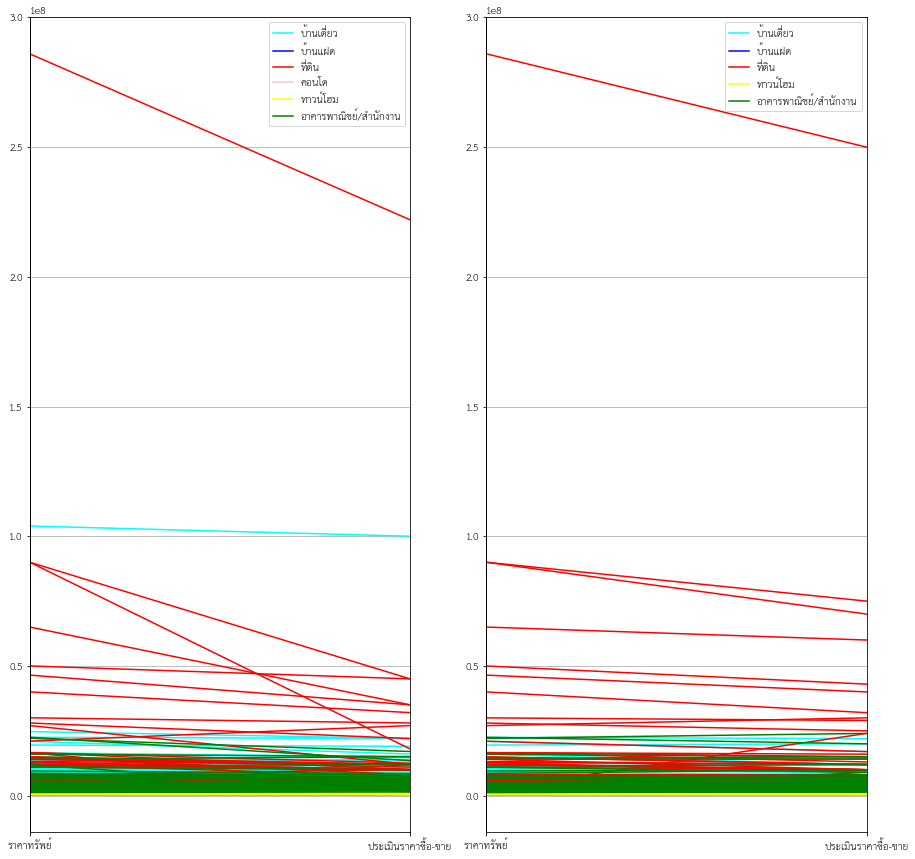

In [108]:
matplotlib.rcParams['figure.figsize']=[15,15]
plt.subplot(1,2,1)
pd.plotting.parallel_coordinates(all_est1, 'property_type',cols = ['ราคาทรัพย์','ประเมินราคาซื้อ-ขาย'], color=['#00FFFF', 'blue','red','pink','yellow','green'])

plt.subplot(1,2,2)
pd.plotting.parallel_coordinates(all_est2, 'property_type',cols = ['ราคาทรัพย์','ประเมินราคาซื้อ-ขาย'], color=['#00FFFF', 'blue','red','yellow','green'])

## ความมั่นใจในการประเมิน

In [109]:
allc = all.groupby(['ID ผู้ประเมิน','ความมั่นใจในการเมินราคาทรัพย์'])[['ความมั่นใจในการเมินราคาทรัพย์']].count().iloc[:2]

Text(0.5, 1.0, 'Home')

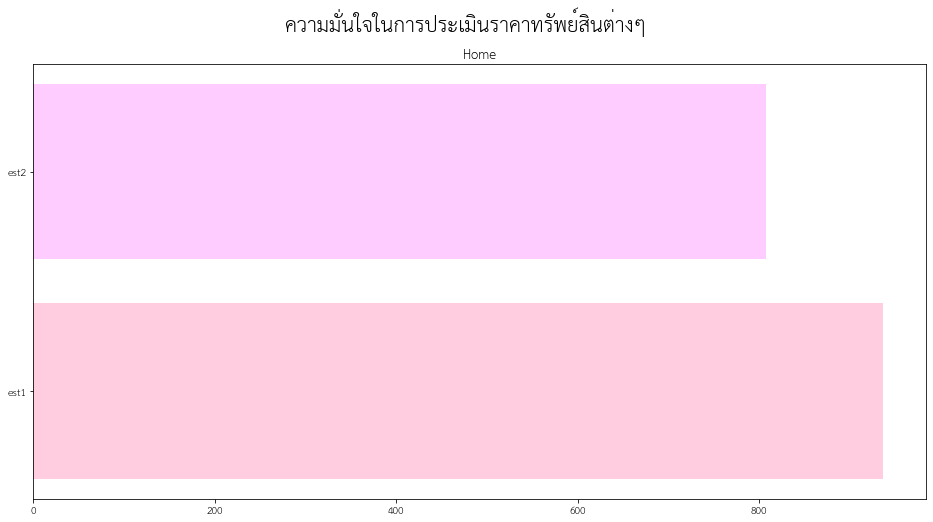

In [110]:
plt.rcParams['figure.figsize']=[16,8]
plt.suptitle('ความมั่นใจในการประเมินราคาทรัพย์สินต่างๆ', fontsize = 20)

plt.barh([1,2],allc['ความมั่นใจในการเมินราคาทรัพย์'],color=['#ffcce0','#ffccff']) 
plt.yticks([1,2],['est1','est2'])
plt.title('Home')

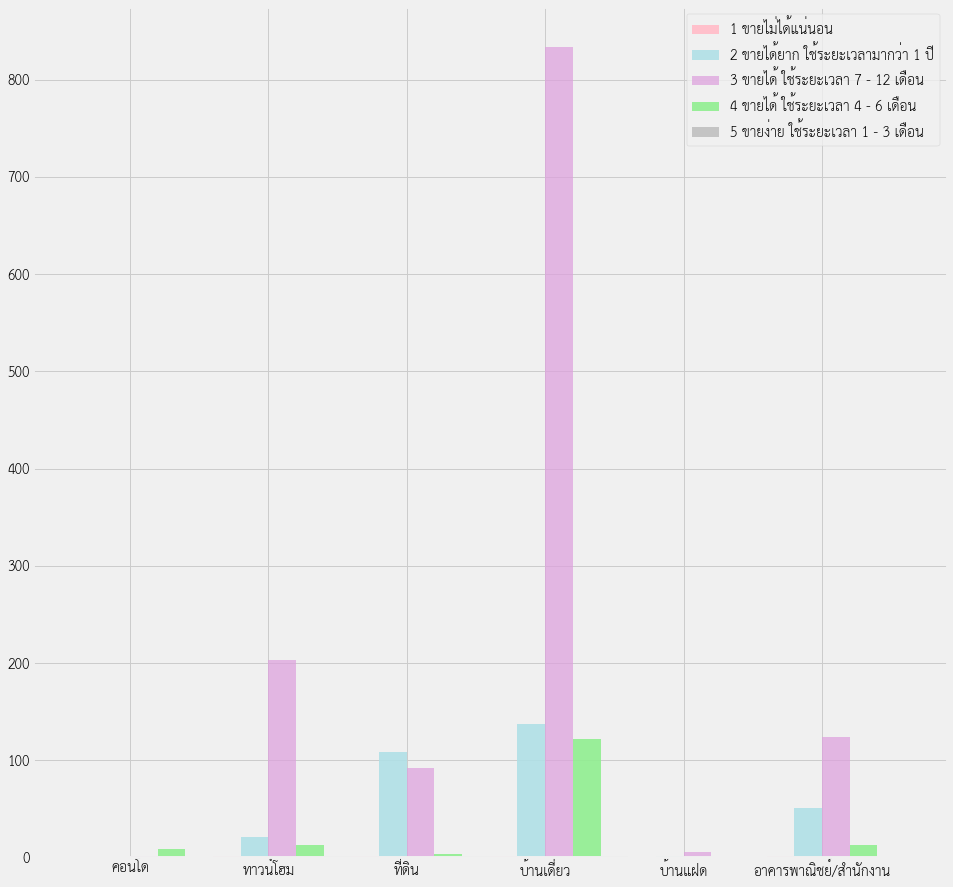

In [115]:
all_est_score = all_est.pivot_table('post id',index='property_type',columns='ให้คะแนนทรัพย์',aggfunc='count').reset_index().fillna(0)
matplotlib.rcParams['figure.figsize']=[10,10]
name = all_est_score.reset_index()['property_type']
aaa = all_est_score['1 ขายไม่ได้แน่นอน']
bbb = all_est_score['2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี']
ccc = all_est_score['3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน']
ddd = all_est_score['4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน']
eee = all_est_score['5 ขายง่าย ใช้ระยะเวลา 1 - 3 เดือน']
figure(figsize=(15,15), dpi=70)
x = np.arange(len(aaa))
x2=x
w=0.2
plt.bar(x,aaa,width=w,color='pink',label='1 ขายไม่ได้แน่นอน')
x=x+w
plt.bar(x,bbb,width=w,color='powderblue',alpha = 0.9,label='2 ขายได้ยาก ใช้ระยะเวลามากว่า 1 ปี')
x=x+w
plt.bar(x,ccc,width=w,color='plum',alpha = 0.72,label='3 ขายได้ ใช้ระยะเวลา 7 - 12 เดือน')
x=x+w
plt.bar(x,ddd,width=w,color='lightgreen',alpha = 0.9,label='4 ขายได้ ใช้ระยะเวลา 4 - 6 เดือน')
x=x+w
plt.bar(x,eee,width=w,color='silver',alpha = 0.9,label='5 ขายง่าย ใช้ระยะเวลา 1 - 3 เดือน')

plt.xticks(x2+(w+(w/2)),name,rotation=0)
plt.legend();

## ความสัมพันธ์ระหว่างราคา(ตั้งขายและประเมิน)-ความมั่นใจ-ให้คะแนนทรัพย์

Text(0.5, 1.0, 'Home')

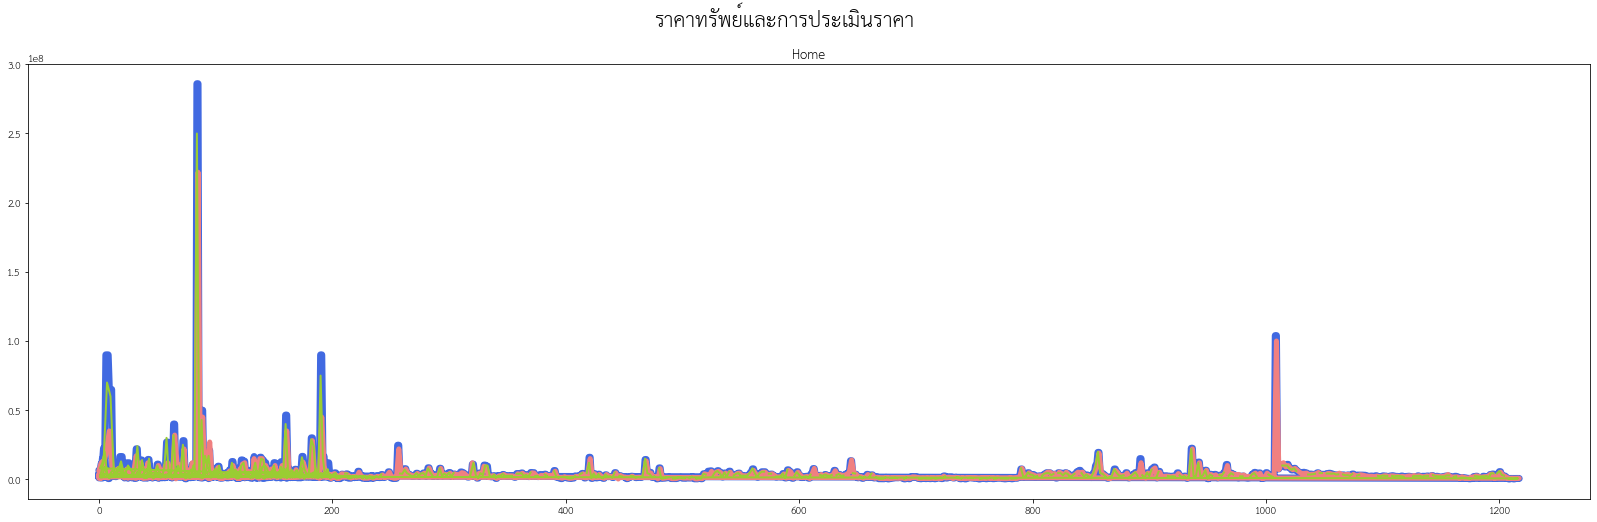

In [112]:
plt.rcParams['figure.figsize']=[28,8]
plt.suptitle('ราคาทรัพย์และการประเมินราคา', fontsize = 20)

plt.plot(all['ราคาทรัพย์'], linestyle='-', linewidth=7, color='royalblue', label='ราคาทรัพย์')
plt.plot(all_est1['ประเมินราคาซื้อ-ขาย'], linestyle='-', linewidth=5 , color='lightcoral', label='นักประเมินคนที่ 1')
plt.plot(all_est2['ประเมินราคาซื้อ-ขาย'], linestyle='-',linewidth=2 , color='yellowgreen',  label='นักประเมินคนที่ 2')
plt.title('Home')

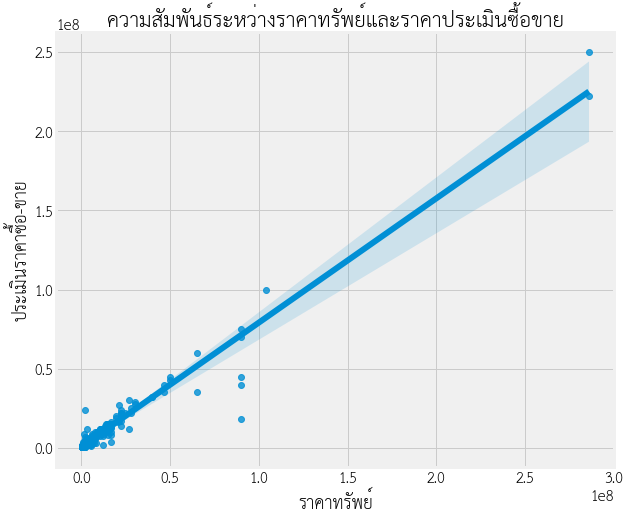

In [113]:
plt.figure(figsize=(10, 8))
plt.style.use('fivethirtyeight')
plt.title("ความสัมพันธ์ระหว่างราคาทรัพย์และราคาประเมินซื้อขาย")
sns.regplot(x="ราคาทรัพย์", y="ประเมินราคาซื้อ-ขาย", data=all_est)
plt.show()

<Figure size 1050x1050 with 0 Axes>

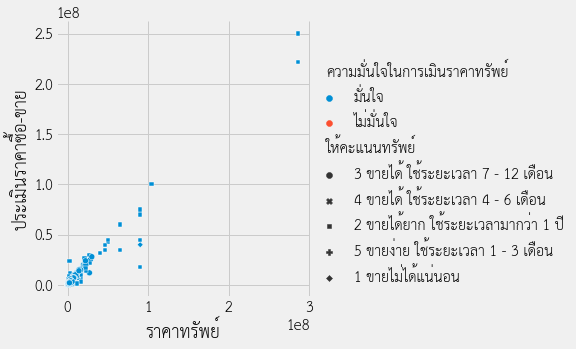

In [114]:
figure(figsize=(15,15), dpi=70)
sns.relplot(data=all_est, x="ราคาทรัพย์", y="ประเมินราคาซื้อ-ขาย", hue="ความมั่นใจในการเมินราคาทรัพย์",style="ให้คะแนนทรัพย์")